In [31]:
%matplotlib inline

import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

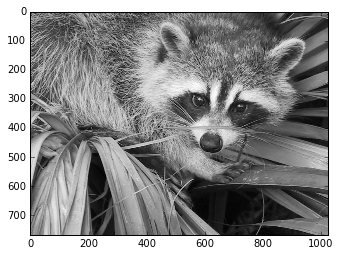

In [32]:
f = misc.face(gray=True)
plt.gray()
plt.imshow(f)
plt.show()

In [19]:
U, s, V = np.linalg.svd(f, full_matrices=True)

In [24]:
print(U.shape, V.shape, s.shape)
M = U.shape[0]
N = V.shape[0]
d = min(M, N)
print(d)

(768, 768) (1024, 1024) (768,)
768


In [27]:
S = np.zeros((M, N), dtype=complex)
S[:d, :d] = np.diag(s)

In [28]:
print(S.shape)

(768, 1024)


In [74]:
def reconstruct(dims):
    S = np.zeros((M, N))
    S[:dims, :dims] = np.diag(s[:dims])
    return np.dot(U, np.dot(S, V))

In [75]:
# Confirm that reconstruction works.
new_f = reconstruct(d)
np.allclose(f, new_f)

True

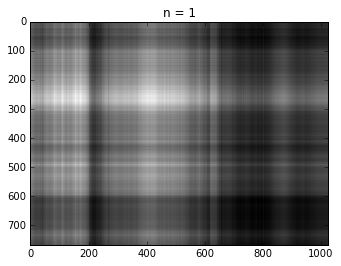

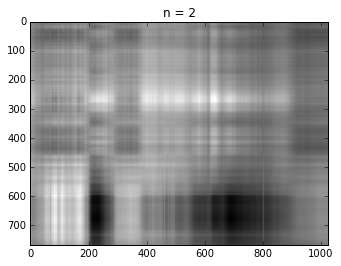

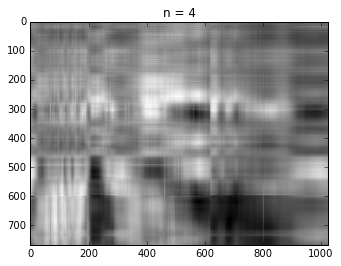

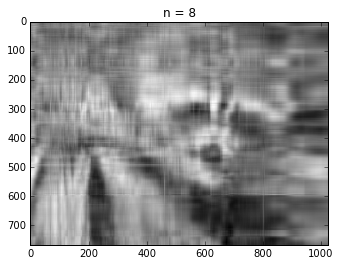

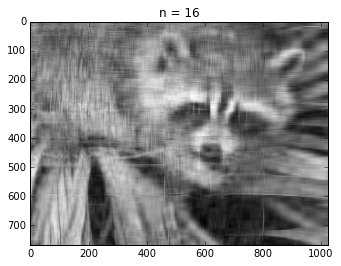

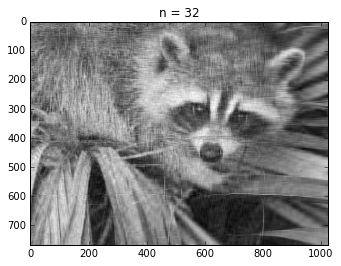

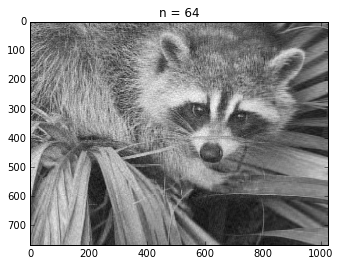

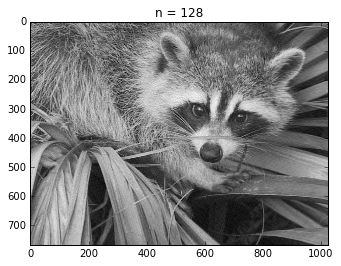

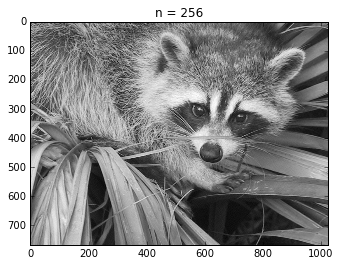

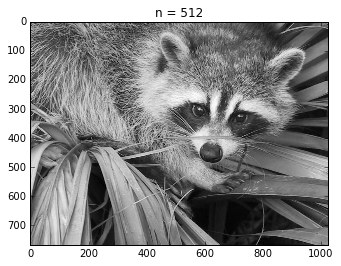

In [86]:
# Try reconstructing with increasing numbers of SVs.
i = 1
while i < d:
    plt.gray()
    plt.imshow(reconstruct(i))
    plt.title('n = {}'.format(i))
    plt.show()
    i *= 2